# Intro to Neural Networks
A short demo adapted from [iamtrask's github pages](http://iamtrask.github.io/2015/07/12/basic-python-network/).

In [1]:
%matplotlib inline
from __future__ import print_function
from __future__ import division
import numpy as np
np.random.seed(42)

import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']
import matplotlib.pyplot as plt


Imports the input data. Each column corresponds to some feature and each row corresponds to an observation.

In [2]:
X = np.array([ [0, 0, 1],
               [0, 1, 1],
               [1, 0, 1],
               [0, 1, 1]
             ])
print(X)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 1]]


Imports the labeled *training* data. This is a classification problem with Boolean labels (i.e. `0` or `1`).

In [3]:
y = np.array([[0, 0, 1, 1]]).T
print(y)

[[0]
 [0]
 [1]
 [1]]


In [4]:
syn0 = 2 * np.random.rand(3,1) - 1
print(syn0)

[[-0.25091976]
 [ 0.90142861]
 [ 0.46398788]]


Defines the logistic function and it's (easily computed) derivative. The logistic function maps every input to the interval `(0, 1)`.

In [5]:
def nonlin(x, deriv=False):
  if deriv:
    return x * (1 - x)
  return 1.0 / (1 + np.exp(-x))

In [6]:
# forward propagation
l0 = X
l1 = nonlin(np.dot(l0, syn0))
l1_error = y - l1
print(l1_error)

[[-0.61395979]
 [-0.79663861]
 [ 0.44693358]
 [ 0.20336139]]


In [7]:
# Calculate change in error with repsect to change in weight
l1_delta = l1_error * nonlin(l1, True)
print(l1_delta)

[[-0.14551655]
 [-0.12905986]
 [ 0.11047481]
 [ 0.03294567]]


In [8]:
syn0 += np.dot(l0.T, l1_delta)
print(syn0)

[[-0.14044495]
 [ 0.80531442]
 [ 0.33283195]]


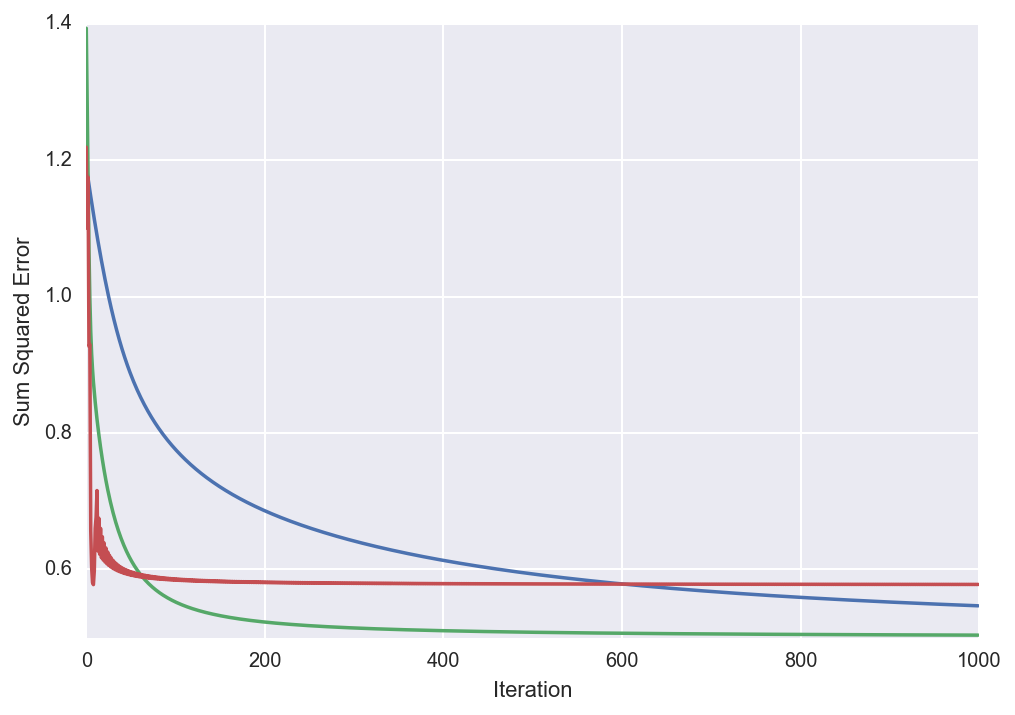

[[0]
 [0]
 [1]
 [1]]
[[ 0.01885265]
 [ 0.69684984]
 [ 0.99419245]
 [ 0.69684984]]


In [9]:
np.random.seed(1)
X = np.array([ [0, 0, 1],
               [0, 1, 1],
               [1, 0, 1],
               [0, 1, 1]
             ])
y = np.array([[0, 0, 1, 1]]).T
nr = 1000
errors = np.empty((1000, 1), dtype=np.float)

for alpha in [0.1, 1.0, 10.0]:

  syn0 = 2 * np.random.rand(3,1) - 1

  for i in range(nr):
    l1 = nonlin(np.dot(X, syn0))
    l1_error = y - l1
    l1_delta = l1_error * nonlin(l1, True)

    syn0 += alpha * np.dot(l0.T, l1_delta)

    errors[i] = np.sum(l1_error ** 2)

  plt.plot(errors)


plt.xlabel('Iteration')
plt.ylabel('Sum Squared Error')
plt.show()

print(y)
print(l1)


[[ 50.04882067]
 [ 24.09495374]
 [-19.60768361]]


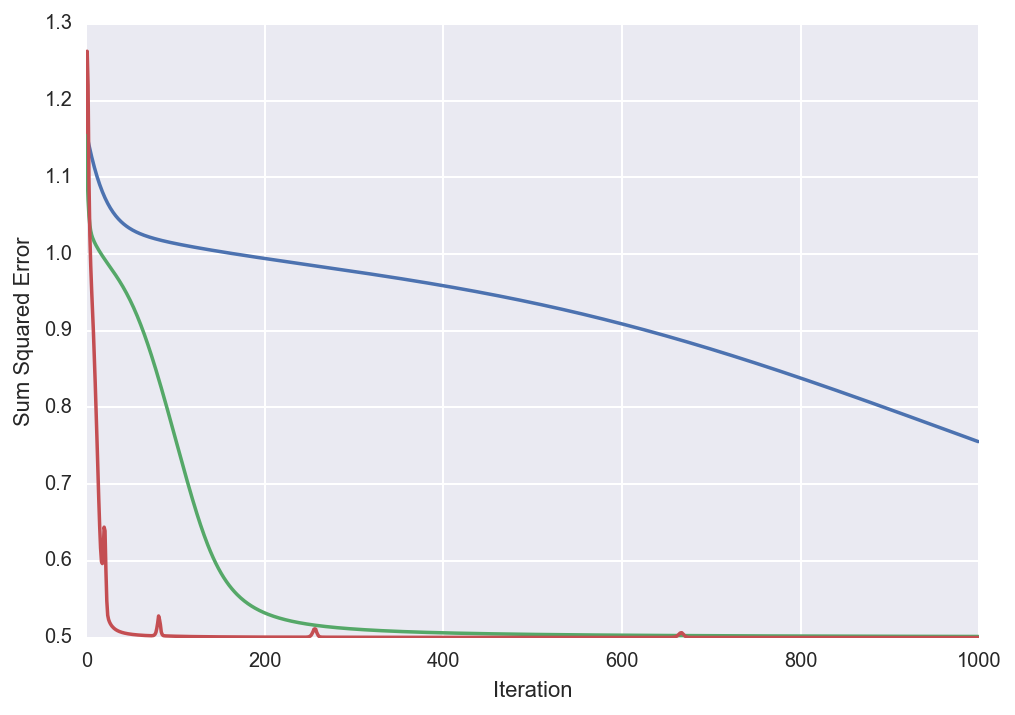

In [14]:
np.random.seed(1)

hidden_dim = 4
for alpha in [0.1, 1.0, 10.0]:

  X = np.array([ [0, 0, 1], 
                 [0, 1, 1], 
                 [1, 0, 1], 
                 [0, 1, 1]
               ])  
  y = np.array([[0, 0, 1, 1]]).T

  n_realizations = 1000
  errors = np.empty((n_realizations, 1), dtype=np.float)


  np.random.seed(42)
  synapse_0 = 2 * np.random.rand(3, hidden_dim) - 1 
  synapse_1 = 2 * np.random.rand(hidden_dim, 1) - 1 

  for i in range(n_realizations):

    # Feed forward through layers 0, 1, and 2
    layer_1 = nonlin(np.dot(X, synapse_0))
    layer_2 = nonlin(np.dot(layer_1, synapse_1))

    # how much did we miss the target value?
    layer_2_error = y - layer_2

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    layer_2_delta = layer_2_error * nonlin(layer_2, deriv=True)

    # how much did each layer_1 value contribute to the layer_2 error 
    # (according to the weights)?
    layer_1_error = layer_2_delta.dot(synapse_1.T)

    # in what direction is the target layer_1?
    # were we really sure? if so, don't change too much.
    layer_1_delta = layer_1_error * nonlin(layer_1, deriv=True)

    synapse_1 += alpha * layer_1.T.dot(layer_2_delta)
    synapse_0 += alpha * X.T.dot(layer_1_delta)

    errors[i] = np.sum(layer_2_error ** 2)


  plt.plot(errors)
  plt.xlabel('Iteration')
  plt.ylabel('Sum Squared Error')

print(synapse_0.dot(synapse_1))
plt.show()